In [1]:
push!(LOAD_PATH,"./src")
using AgentModel
abm = AgentModel

using Random
using PyPlot
using Statistics
using CUDA
using BenchmarkTools

┌ Info: Precompiling AgentModel [top-level]
└ @ Base loading.jl:1278


# Models

## One Global parameter

In [2]:
#Definició del model
a = abm.Model()

# Add some parameter
updates = 
"""
w = 
if ((t_ < 0.5) || (t_ > 0.8)) 
0 
else 
g 
end 
* 3
"""
abm.addGlobal!(a,:w,updates=updates,randVar=[(:g,"Uniform",1.,7.)])

#Creació de agent based model community
com = abm.Community(a)

println("Cells in community: ", com.N_)
println("Global parameter w: ", com[:w])
com[:w] = 4.
println("Global parameter w after update: ", com[:w])

Cells in community: 1
Global parameter w: 0.0
Global parameter w after update: 4.0


### CPU

In [3]:
#Compile
abm.compile!(a,saveRAM=true);

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark abm.evolve(com,tMax_=1,dt_=0.01)

### GPU

In [4]:
#Compile
abm.compile!(a,platform="gpu",saveRAM=true);

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01)

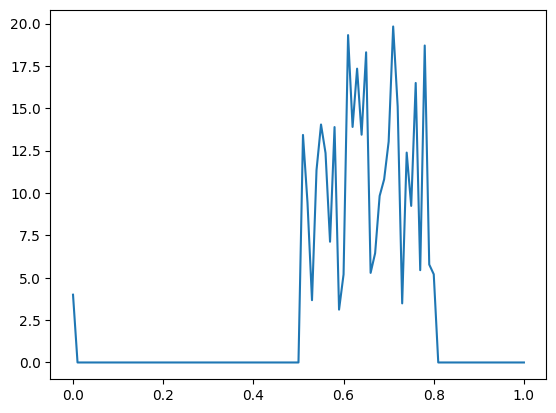

In [5]:
t=[c[:t_] for c in v]
w=[c[:w] for c in v]

plot(t,w)
show()

## Several global parameters

In [9]:
#Create the model
a = abm.Model()

#Fill the model
updates = 
"""
w = 
if ((t_ < 0.5) || (t_ > 0.8)) 
0 
else 
g 
end 
* 3
"""
abm.addGlobal!(a,[:w,:c],updates=updates,randVar=[(:g,"Uniform",1.,7.)])

#Create the cell community
com = abm.Community(a)
#Start the parameters
println("Cells in community: ", com.N_)
println("Global parameter w, c: ", com[:w], ",", com[:c])
com[:w] = 4.
com[:c] = 3.
println("Global parameter w, c after update: ", com[:w],",",com[:c])

Cells in community: 1
Global parameter w, c: 0.0,0.0
Global parameter w, c after update: 4.0,3.0


### CPU

In [11]:
#Compile
abm.compile!(a,saveRAM=true)

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01)

### GPU

In [12]:
#Compile
abm.compile!(a,platform="gpu",saveRAM=true)

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01)

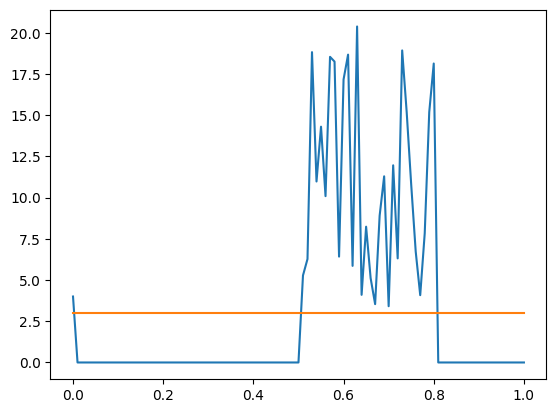

In [13]:
t=[i[:t_] for i in v]
w=[i[:w] for i in v]
c=[i[:c] for i in v]

plot(t,w)
plot(t,c)
show()

## One local parameter

In [14]:
#Create the model
a = abm.Model()

#Fill the model
updates=
"""
w += g*dt_
"""
abm.addLocal!(a,:w,updates=updates,randVar=[(:g,"Uniform",-1.,1.)])

#Create community
N = 100
com = abm.Community(a,N=N)

com[:w] = rand(N);

### CPU

In [15]:
#Compile
abm.compile!(a,saveRAM=true)

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

### GPU

In [16]:
#Compile
abm.compile!(a,platform="gpu",saveRAM=true)

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

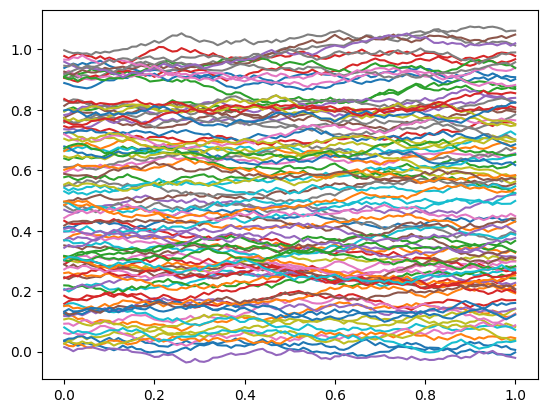

In [17]:
t=[i[:t_] for i in v]
w=[i[:w] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## Several local parameters

In [18]:
#Create the model
a = abm.Model()

#Fill the model
updates=
"""
w += g*dt_
h /= 0.011/dt_
"""
abm.addLocal!(a,[:w,:h],updates=updates,randVar=[(:g,"Uniform",-1.,1.)])

#Create community
N = 100
com = abm.Community(a,N=N)

com[:w] = rand(N);
com[:h] = 4.;

### CPU

In [19]:
#Compile
abm.compile!(a,saveRAM=true)

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.01)

### GPU

In [20]:
#Compile
abm.compile!(a,platform="gpu",saveRAM=true)

v = a.evolve(com,tMax_=1,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.01)

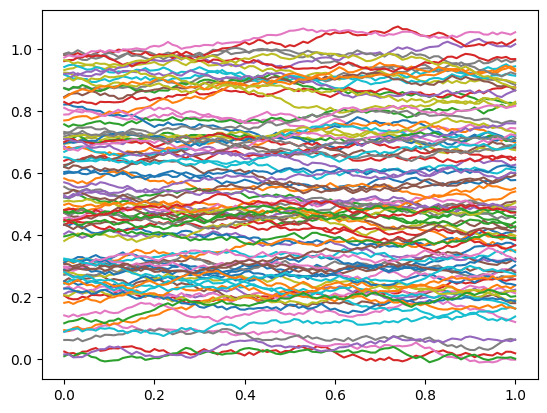

In [21]:
t=[i[:t_] for i in v]
w=[i[:w] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

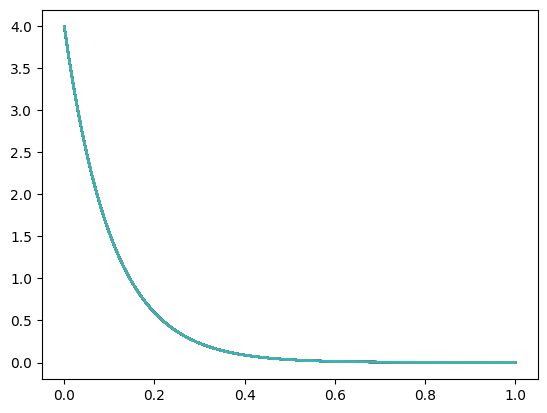

In [22]:
t=[i[:t_] for i in v]
w=[i[:h] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## One variable

In [25]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = -x
"""
abm.addVariable!(a,:x,eqs)

#Create community
N = 1000
com = abm.Community(a,N=N)

com[:x] = rand(N);

### CPU

In [26]:
#Compile
abm.compile!(a,saveRAM=true)

v = a.evolve(com,tMax_=10,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

### GPU

In [27]:
#Compile
abm.compile!(a,platform="gpu",saveRAM=true)

v = a.evolve(com,tMax_=10,dt_=0.01);
#@benchmark evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

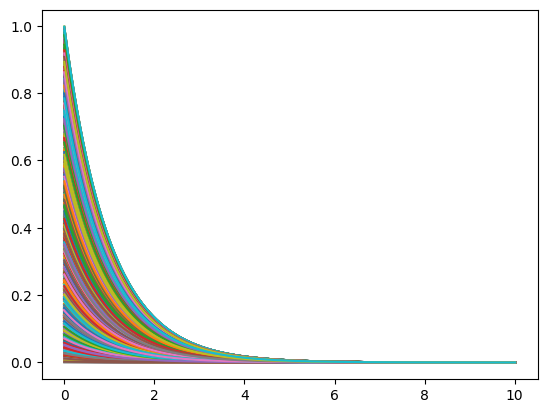

In [28]:
t=[i[:t_] for i in v]
w=[i[:x] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## Several variables

In [30]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = -x
dydt = -0.1*x
"""
abm.addVariable!(a,[:x,:y],eqs)

#Create community
N = 100
com = abm.Community(a,N=N)

com[:x] = rand(N);
com[:y] = 4.;

### CPU

In [31]:
#Compile
abm.compile!(a,saveRAM=true)

v = a.evolve(com,tMax_=10,dt_=0.01);
#@benchmark abm.evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

### GPU

In [32]:
#Compile
abm.compile!(a,platform="gpu",saveRAM=true)

v = a.evolve(com,tMax_=10,dt_=0.01);
#@benchmark abm.evolve(com,tMax_=1,dt_=0.01,tSaveStep_=0.1)

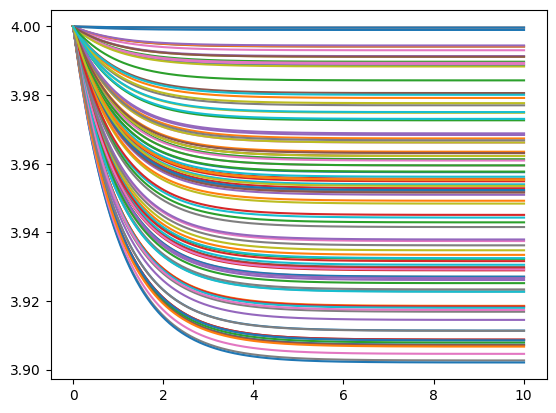

In [33]:
t=[i[:t_] for i in v]
w=[i[:y] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w)
show()

## One variable stochastic

In [35]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = ξ_
"""
abm.addVariable!(a,:x,eqs)

#Create community
N = 1000
com = abm.Community(a,N=N)

com[:x] = 0.;

### CPU

In [36]:
#Compile
abm.compile!(a,saveRAM=true,integrator="eulerSDEIto")

v = a.evolve(com,tMax_=100,dt_=0.01,tSaveStep_=0.1);
#@benchmark evolve(com,tMax_=10,dt_=0.1,tSaveStep_=0.1)

### GPU

In [37]:
#Compile
abm.compile!(a,platform="gpu",integrator="eulerSDEIto",saveRAM=true)

v = a.evolve(com,tMax_=100,dt_=1.,tSaveStep_=1);
#@benchmark evolve(com,tMax_=10,dt_=0.1,tSaveStep_=0.1)

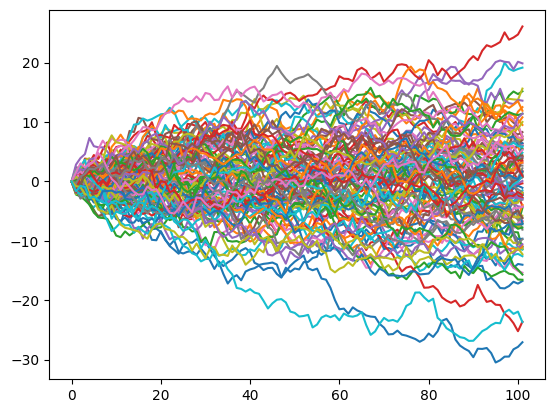

In [38]:
t=[i[:t_] for i in v]
w=[i[:x] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))

plot(t,w[:,1:100])
show()

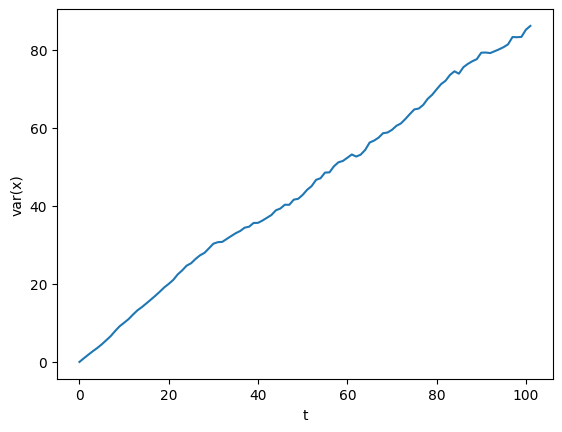

PyObject Text(24.000000000000007, 0.5, 'var(x)')

In [39]:
plot(t,std(w,dims=(2)).^2)
xlabel("t")
ylabel("var(x)")

## Several variables stochastic

In [41]:
#Create the model
a = abm.Model()

#Fill the model
eqs=
"""
dxdt = ξ_ + if x > 1.;
-100.
elseif x < -1.; 
100. 
else; 
0. 
end

dydt = ξ_ + if y > 1.;
-100.
elseif y < -1.; 
100. 
else; 
0. 
end
"""
abm.addVariable!(a,[:x,:y],eqs)

#Create community
N = 1000
com = abm.Community(a,N=N)

com[:x] = 0.;
com[:y] = 0.;

### CPU

In [42]:
#Compile
abm.compile!(a,saveRAM=true,integrator="eulerSDEIto")

v = a.evolve(com,tMax_=100,dt_=0.01,tSaveStep_=0.1);
#@benchmark evolve(com,tMax_=10,dt_=0.1,tSaveStep_=0.1)

### GPU

In [43]:
#Compile
abm.compile!(a,platform="gpu",integrator="eulerSDEIto",saveRAM=true)

v = a.evolve(com,tMax_=100,dt_=0.01,tSaveStep_=1);
#@benchmark evolve(com,tMax_=100,dt_=0.01,tSaveStep_=50)

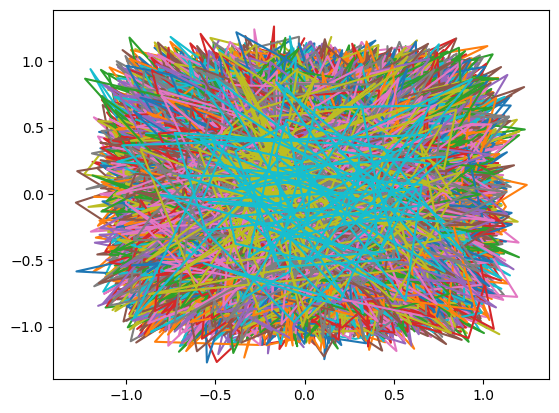

In [44]:
t=[i[:t_] for i in v]
w=[i[:x] for i in v]
w2=[i[:y] for i in v]
w=permutedims(reshape(hcat(w...), (length(w[1]), length(w))))
w2=permutedims(reshape(hcat(w2...), (length(w2[1]), length(w2))))

plot(w[:,1:1000],w2[:,1:1000])
show()

## Neighborhoods & Single local interactions

In [45]:
N = 1000
x = rand(N);
y = rand(N);

platform = "gpu"

"gpu"

### Neighbours Full

In [46]:
#Create Agent model
a = abm.Model()

#Add local parameters
abm.addLocal!(a,[:x1,:x2])
#Add neighbourhood
abm.setNeighborhoodFull!(a)

interaction = 
"""
f₁ += if sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.; 1. else; 0. end
"""
#Add local interaction
abm.addLocalInteraction!(a,[:f],interaction)
com = abm.Community(a,N = N)

com[:x1] = sqrt(N)*x;
com[:x2] = sqrt(N)*y;

In [48]:
abm.compile!(a,platform=platform,saveRAM=true);

In [49]:
v1 = a.evolve(com,dt_=0.1,tMax_=10);
@benchmark abm.evolve(com,dt_=0.1,tMax_=10)

BenchmarkTools.Trial: 
  memory estimate:  8.26 MiB
  allocs estimate:  307203
  --------------
  minimum time:     34.611 ms (0.00% GC)
  median time:      34.777 ms (0.00% GC)
  mean time:        36.364 ms (2.95% GC)
  maximum time:     47.157 ms (24.62% GC)
  --------------
  samples:          138
  evals/sample:     1

In [50]:
v1[3][:f][1:10]

10-element Array{AbstractFloat,1}:
 7.0f0
 3.0f0
 5.0f0
 1.0f0
 5.0f0
 4.0f0
 4.0f0
 3.0f0
 2.0f0
 2.0f0

### Neighbours Adjacency

In [51]:
#Create Agent model
a = abm.Model()

#Add local parameters
abm.addLocal!(a,[:x1,:x2])
#Add adjacentcy
abm.setNeighborhoodAdjacency!(a,"sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.5",100)

interaction = 
"""
f₁ += if sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.; 1. else; 0. end
"""
#Add local interaction
abm.addLocalInteraction!(a,[:f],interaction)
com = abm.Community(a,N = N)

com[:x1] = sqrt(N)*x;
com[:x2] = sqrt(N)*y;

In [52]:
abm.compile!(a,platform=platform,saveRAM=true);

In [53]:
v2 = a.evolve(com,dt_=0.1,tMax_=10);
#@benchmark a.evolve(com,dt_=0.1,tMax_=10)

BenchmarkTools.Trial: 
  memory estimate:  8.36 MiB
  allocs estimate:  310837
  --------------
  minimum time:     14.099 ms (0.00% GC)
  median time:      14.250 ms (0.00% GC)
  mean time:        15.310 ms (6.43% GC)
  maximum time:     26.392 ms (43.30% GC)
  --------------
  samples:          327
  evals/sample:     1

In [54]:
v2[3][:f][1:10]

10-element Array{AbstractFloat,1}:
 7.0f0
 3.0f0
 5.0f0
 1.0f0
 5.0f0
 4.0f0
 4.0f0
 3.0f0
 2.0f0
 2.0f0

In [55]:
v1[3][:f] == v2[3][:f]

true

### Neighbours Grid

In [57]:
#Create Agent model
a = abm.Model()

#Add local parameters
abm.addLocal!(a,[:x1,:x2])
#Add adjacentcy
abm.setNeighborhoodGrid!(a,[:x1,:x2],[[0.,0.] [sqrt(N),sqrt(N)]],1.)

interaction = 
"""
f₁ += if sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.; 1. else; 0. end
"""
#Add local interaction
abm.addLocalInteraction!(a,[:f],interaction)
com = abm.Community(a,N = N)

com[:x1] = sqrt(N)*x;
com[:x2] = sqrt(N)*y;

In [58]:
abm.compile!(a,platform=platform,saveRAM=true);

In [59]:
v3 = a.evolve(com,dt_=0.1,tMax_=10);
#@benchmark a.evolve(com,dt_=0.1,tMax_=10)

In [60]:
v3[2][:f]==v1[2][:f]==v2[2][:f]

true

In sparse spaces, the grid can clearly improve time in comparison with adjacentcy matrices as it scales linearly with size.

## Several local interactions

In [61]:
#Create Agent model
a = abm.Model()

#Add local parameters
abm.addLocal!(a,[:x1,:x2])
abm.addLocal!(a,[:g])

interaction = 
"""
f₁ += g₂
h₁ += if sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.1; 1. else; 0. end
"""
#Add local interaction
abm.addLocalInteraction!(a,[:f,:h],interaction)
N = 9
com = abm.Community(a,N = N)

com[:x1] = [-1.,0.,1.,-1.,0.,1.,-1.,0.,1.];
com[:x2] = [-1.,-1.,-1.,0.,0.,0.,1.,1.,1.];
com[:g] = ones(9)#[1.,2.,3.,4.,5.,6.,7.,8.,9.];

### CPU

In [62]:
#Add neighbourhood
abm.setNeighborhoodFull!(a)

abm.compile!(a,platform="cpu",saveRAM=true);

In [63]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = a.evolve(com,dt_=0.1,tMax_=0.2);

v[2][:h]

9-element Array{AbstractFloat,1}:
 3.0
 4.0
 3.0
 4.0
 5.0
 4.0
 3.0
 4.0
 3.0

In [64]:
#Add adjacentcy
abm.setNeighborhoodAdjacency!(a,"sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.5",100)

abm.compile!(a,platform="cpu",saveRAM=true);

In [65]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = abm.evolve(com,dt_=0.1,tMax_=0.2);

v[2][:h]

9-element Array{AbstractFloat,1}:
 3.0
 4.0
 3.0
 4.0
 5.0
 4.0
 3.0
 4.0
 3.0

In [67]:
#Add adjacentcy
abm.setNeighborhoodGrid!(a,[:x1,:x2],[[-1.,-1.] [1.,1.]],.45)

abm.compile!(a,platform="cpu",saveRAM=true);

In [68]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = a.evolve(com,dt_=0.1,tMax_=0.2);

v[2][:h]

9-element Array{AbstractFloat,1}:
 3.0
 4.0
 3.0
 4.0
 5.0
 4.0
 3.0
 4.0
 3.0

### GPU

In [69]:
#Add neighbourhood
abm.setNeighborhoodFull!(a)

abm.compile!(a,platform="gpu",saveRAM=true);

In [70]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = a.evolve(com,dt_=0.1,tMax_=0.2);

v[2][:h]

9-element Array{AbstractFloat,1}:
 3.0f0
 4.0f0
 3.0f0
 4.0f0
 5.0f0
 4.0f0
 3.0f0
 4.0f0
 3.0f0

In [71]:
#Add adjacentcy
abm.setNeighborhoodAdjacency!(a,"sqrt((x1₁-x1₂)^2+(x2₁-x2₂)^2)<1.5",100)

abm.compile!(a,platform="gpu",saveRAM=true);

In [72]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = a.evolve(com,dt_=0.1,tMax_=0.2);

v[2][:h]

9-element Array{AbstractFloat,1}:
 3.0f0
 4.0f0
 3.0f0
 4.0f0
 5.0f0
 4.0f0
 3.0f0
 4.0f0
 3.0f0

In [74]:
#Add adjacentcy
abm.setNeighborhoodGrid!(a,[:x1,:x2],[[-1.,-1.] [1.,1.]],.45)

abm.compile!(a,platform="gpu",saveRAM=true);

In [75]:
com.t_=0.
#com[:x1] = [0.9];
#com[:x2] = [0.9];
v = a.evolve(com,dt_=0.1,tMax_=0.2);

v[2][:h]

9-element Array{AbstractFloat,1}:
 3.0f0
 4.0f0
 3.0f0
 4.0f0
 5.0f0
 4.0f0
 3.0f0
 4.0f0
 3.0f0

## One interaction

In [76]:
a = abm.Model()

abm.addGlobal!(a,:g)
abm.addLocal!(a,[:y,:m])

eqs=
"""
dxdt = f
"""
abm.addVariable!(a,[:x],eqs)

inter = 
"""
f₁ += 
if y₁ == y₂;
    m*g*(x₂-x₁)
else;
    0
end
"""
abm.addInteraction!(a,:f,inter)

In [77]:
N = 8
com = abm.Community(a,N = N)

com[:x] = [-1.,0.,-1.,0.,-1.,0.,-1.,0.];
com[:y] = [0.,0.,1.,1.,2.,2.,3.,3.];
com[:g] = 1.;
com[:m] = [1.,1.,1.,2.,1.,3.,1.,4.];

In [78]:
abm.compile!(a,integrator="eulerSDEIto",platform="gpu",saveRAM=true);

In [79]:
v = a.evolve(com,dt_=0.01,tMax_=10.);

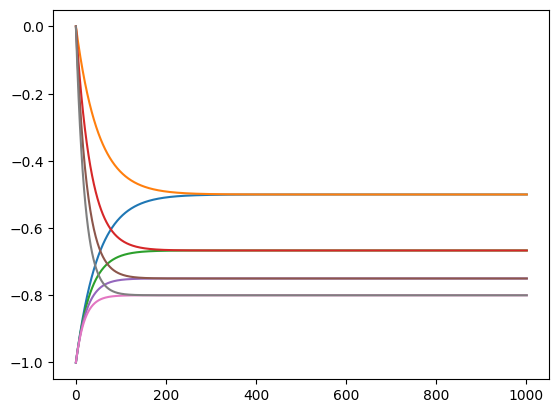

In [80]:
pos = [i[:x] for i in v]

plot(pos)
display()

## Several interactions

In [86]:
a = abm.Model()

abm.addGlobal!(a,:g)
abm.addLocal!(a,[:y,:m])

eqs=
"""
dxdt = f
"""
abm.addVariable!(a,[:x],eqs)

inter = 
"""
f₁ += 
if y₁ == y₂;
    m*g*(x₂-x₁)
else;
    0
end
h₁ += 0.
"""
abm.addInteraction!(a,[:f,:h],inter)

In [87]:
N = 8
com = abm.Community(a,N = N)

com[:x] = [-1.,0.,-1.,0.,-1.,0.,-1.,0.];
com[:y] = [0.,0.,1.,1.,2.,2.,3.,3.];
com[:g] = 1.;
com[:m] = [1.,1.,1.,2.,1.,3.,1.,4.];

In [88]:
abm.compile!(a,integrator="eulerSDEIto",platform="gpu",saveRAM=true);

In [84]:
v = a.evolve(com,dt_=0.01,tMax_=10.);

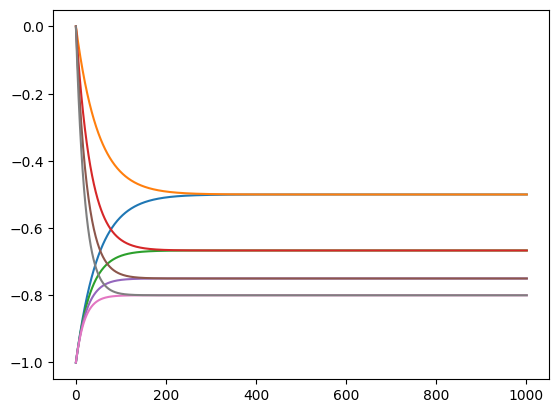

In [85]:
pos = [i[:x] for i in v]

plot(pos)
display()

## Division

In [2]:
a = abm.Model();
abm.addLocal!(a,[:g,:tDiv]); #Add two local variables, g and the time of division tDiv

condition = 
"
tDiv < t_
"

update =
"
g₂ = gₚ*(1-r)
tDiv₂ = tDivₚ+1.

g₁ = gₚ*r #Asymmetric split of the component between the two daughter particles
tDiv₁ = tDivₚ+1.
"

abm.addDivisionProcess!(a,condition,update,randVar=[(:r,"Uniform",0.,1.)])

In [3]:
abm.compile!(a,platform="gpu",saveRAM=true,debug=true);

function evolve(com::Community; tMax_, dt_, t_ = com.t_, N_ = com.N_, nMax_ = com.N_, neighMax_ = nMax_, tSave_ = 0.0, tSaveStep_ = dt_, threads_ = 256)


    loc_ = CUDA.CuArray{Float32}(com.loc)
    loc_ = [loc_; CUDA.zeros(nMax_ - (size(com.loc))[1], 2)]
    locRand_ = CUDA.zeros(nMax_, 1)
    ids_ = CUDA.zeros(Int, nMax_, 2)
    divList_ = CUDA.zeros(Int, nMax_)
    divN_ = CUDA.zeros(Int, 1)
    commRAM_ = Array{Community}([com])

    function addDiv1_(dt_, t_, N_, loc_, locRand_, ids_, divList_, divN_)


        index_ = (threadIdx()).x + ((blockIdx()).x - 1) * (blockDim()).x

        stride_ = (blockDim()).x * (gridDim()).x

        for ic1_ = index_:stride_:N_

            if loc_[ic1_, 2] < t_

                divN = CUDA.atomic_add!(pointer(divN_, 1), 1)

                divList_[divN] = ic1_
            end
        end

        return
    end
    function addDiv2_(dt_, t_, N_, loc_, locRand_, ids_, divList_, divN_)


        index_ = (threadIdx()).x + ((blockIdx()).x - 1) * 

In [4]:
com = Community(a,N=1);

com[:g]=10.
com[:tDiv]=1.
com[:id_]=1

1

In [5]:
com = a.evolve(com,dt_=0.1,tMax_=4.,nMax_=50);

0
0
0
0
0
0
0
0
0
0
0
1
ERROR: a exception was thrown during kernel execution.
       Run Julia on debug level 2 for device stack traces.


LoadError: KernelException: exception thrown during kernel execution on device GeForce RTX 2070 SUPER

In [6]:
com[end][:id_]

LoadError: UndefVarError: com not defined

# Visualization

In [1]:
using AbstractPlotting
using GLMakie
AbstractPlotting.inline!(true)

false

In [3]:
mesh(Sphere(Point3f0(0, 0, 1.), .1f0), color=RGBf0(1, 0.7, 0.3))
for t in LinRange(0,2pi,10)
    mesh!(Sphere(Point3f0(cos(t), sin(t), 1.), .1f0), color=RGBf0(1, 0.7, 0.3))
end
mesh!(Sphere(Point3f0(0, 0, 1.), .1f0), color=RGBf0(1, 0.7, 0.3))

Scene (960px, 540px):
  13 Plots:
    ├ Combined{AbstractPlotting.axis3d,Tuple{Tuple{Tuple{Float32,Float32},Tuple{Float32,Float32},Tuple{Float32,Float32}}}}
    ├ Combined{AbstractPlotting.mesh,Tuple{GeometryBasics.Mesh{3,Float32,GeometryBasics.Ngon{3,Float32,3,GeometryBasics.PointMeta{3,Float32,Point{3,Float32},(:uv, :normals),Tuple{Vec{2,Float32},Vec{3,Float32}}}},FaceView{GeometryBasics.Ngon{3,Float32,3,GeometryBasics.PointMeta{3,Float32,Point{3,Float32},(:uv, :normals),Tuple{Vec{2,Float32},Vec{3,Float32}}}}}}}}
    ├ Combined{AbstractPlotting.mesh,Tuple{GeometryBasics.Mesh{3,Float32,GeometryBasics.Ngon{3,Float32,3,GeometryBasics.PointMeta{3,Float32,Point{3,Float32},(:uv, :normals),Tuple{Vec{2,Float32},Vec{3,Float32}}}},FaceView{GeometryBasics.Ngon{3,Float32,3,GeometryBasics.PointMeta{3,Float32,Point{3,Float32},(:uv, :normals),Tuple{Vec{2,Float32},Vec{3,Float32}}}}}}}}
    ├ Combined{AbstractPlotting.mesh,Tuple{GeometryBasics.Mesh{3,Float32,GeometryBasics.Ngon{3,Float32,3,GeometryBa

All errors:
MethodError: no method matching iswritable(::Base64.Base64EncodePipe)
Closest candidates are:
  iswritable(::MbedTLS.SSLContext) at /home/gabriel/.julia/packages/MbedTLS/4YY6E/src/ssl.jl:161
  iswritable(::Sockets.TCPSocket) at /build/julia/src/julia-1.5.3/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:143
  iswritable(::Mmap.Anonymous) at /build/julia/src/julia-1.5.3/usr/share/julia/stdlib/v1.5/Mmap/src/Mmap.jl:45
  ...
ArgumentError: Package ImageMagick not found in current path:
- Run `import Pkg; Pkg.add("ImageMagick")` to install the ImageMagick package.

MethodError: no method matching save(::FileIO.Stream{FileIO.DataFormat{:PNG},Base64.Base64EncodePipe}, ::Array{ColorTypes.RGB{FixedPointNumbers.Normed{UInt8,8}},2})
Closest candidates are:
  save(::FileIO.File{FileIO.DataFormat{:PNG}}, ::Any) at /home/gabriel/.julia/packages/FileIO/2fEu2/src/mimesave.jl:5
  save(::FileIO.File{FileIO.DataFormat{:SVG}}, ::Any) at /home/gabriel/.julia/packages/FileIO/2fEu2/src/mimesa

Errors encountered while saving nothing.

Fatal error:
